In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix,make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-red.csv',delimiter=';')
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [2]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X_data=pd.DataFrame(normalized_list,columns=col_names)

In [3]:
y=pd.cut(y,bins=3,labels=['poor','normal','excellent'])
label_map={'poor':0,'normal':1,'excellent':2}
y=y.map(label_map)
y=np.array(y)

In [4]:
f1=make_scorer(f1_score,average='weighted')

In [5]:
grid_params={
    'kernel':['linear','poly','rbf'],
    'C':[0.1,1,10,100,1000],
    'gamma':[0.0001,0.001,0.01,0.1,1],
    }
svm_cross_val_clf=GridSearchCV(SVC(class_weight='balanced'),param_grid=grid_params,cv=10,return_train_score=False,scoring=f1)
svm_cross_val_clf.fit(X_data,y)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(f1_score, average=weighted))

In [6]:
df_svm=pd.DataFrame(svm_cross_val_clf.cv_results_)

In [7]:
df_svm.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [8]:
df_svm.sort_values(by='mean_test_score',ascending=False)[['param_C','param_gamma','param_kernel','mean_test_score']]

,param_C,param_gamma,param_kernel,mean_test_score
74,1000,1,rbf,0.736242
40,10,0.1,poly,0.723693
73,1000,1,poly,0.715209
58,100,1,poly,0.703185
59,100,1,rbf,0.702590
...,...,...,...,...
64,1000,0.001,poly,0.032445
61,1000,0.0001,poly,0.032445
52,100,0.01,poly,0.006090
46,100,0.0001,poly,0.006090


In [9]:
svm_cross_val_clf.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.2,random_state=42)

In [11]:
svmclf=SVC(C=svm_cross_val_clf.best_params_['C'],gamma=svm_cross_val_clf.best_params_['gamma'],kernel=svm_cross_val_clf.best_params_['kernel'],class_weight='balanced')

In [12]:
svmclf.fit(X_train,y_train)   
y_pred_svm=svmclf.predict(X_test) 
score=f1_score(y_test,y_pred_svm,average='weighted')
cm=pd.DataFrame(confusion_matrix(y_test,y_pred_svm ),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])

In [13]:
score

0.7960445390971034

In [14]:
sum(y==0),sum(y==1),sum(y==2)

(63, 1319, 217)

In [15]:
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,4,7,0
true_normal,23,205,34
true_excellent,0,9,38


In [16]:
len(svmclf.support_vectors_)

678

In [17]:
X_train.shape

(1279, 11)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=2).fit(X_data)

In [20]:
X_data_reshaped=pca.transform(X_data)

In [21]:
X_data_reshaped.shape

(1599, 2)

In [22]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

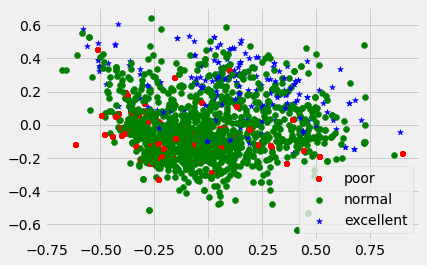

<Figure size 432x288 with 0 Axes>

In [23]:
for i in range(0,X_data_reshaped.shape[0]):
    if y[i]==0:
        class_1=plt.scatter(X_data_reshaped[i,0],X_data_reshaped[i,1],c='r',marker='+')
    elif y[i]==1:
        class_2=plt.scatter(X_data_reshaped[i,0],X_data_reshaped[i,1],c='g',marker='o')
    elif y[i]==2:
        class_3=plt.scatter(X_data_reshaped[i,0],X_data_reshaped[i,1],c='b',marker='*')
plt.legend([class_1,class_2,class_3],['poor','normal','excellent'])
plt.show()

In [24]:
X_train_reshaped,X_test_reshaped,y_train_reshaped,y_test_reshaped=train_test_split(X_data_reshaped,y,test_size=0.2,random_state=42)
svmclf.fit(X_train_reshaped,y_train_reshaped)   
y_reshaped_pred_svm=svmclf.predict(X_test_reshaped) 
score_reshaped=f1_score(y_test_reshaped,y_reshaped_pred_svm,average='weighted')
cm_reshaped=pd.DataFrame(confusion_matrix(y_test_reshaped,y_reshaped_pred_svm ),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])

In [25]:
score_reshaped

0.6433947142442268

In [26]:
cm_reshaped

,predicted_poor,predicted_normal,predicted_excellent
true_poor,7,3,1
true_normal,67,139,56
true_excellent,4,4,39


In [27]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

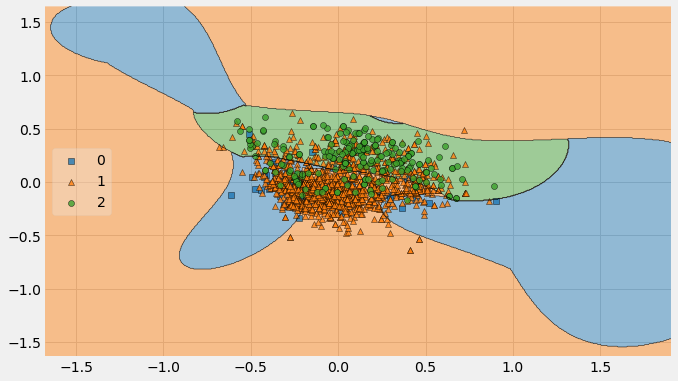

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
x_min,x_max=X_train_reshaped[:,0].min()-1,X_train_reshaped[:,0].max()+1
y_min,y_max=X_train_reshaped[:,1].min()-1,X_train_reshaped[:,1].max()+1
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plot_decision_regions(X=X_data_reshaped,y=y,clf=svmclf,legend=6,ax=ax)